In [1]:
import pandas as pd 
import numpy as np 
import sklearn
import json
import jieba
from tqdm import tqdm
from matplotlib import pyplot as plt

# f = open('stopwords.txt', 'r', encoding = 'UTF-8')
# stopwords = []
# for i in f.read():
#     stopwords.append(i)
# f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'stopwords.txt'

In [ ]:
poet = pd.DataFrame()
#read song poet 255, 57
for i in tqdm(range(255)):
    f = pd.read_json('json/poet.song.{}.json'.format(i*1000))
    poet = poet.append(f)
for i in tqdm(range(57)):
    f = pd.read_json('json/poet.tang.{}.json'.format(i*1000))
    poet = poet.append(f)
poet.reset_index(drop=True)

In [62]:
#see data
print(poet.info())
poet.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20008 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   author      20008 non-null  object 
 1   paragraphs  20008 non-null  object 
 2   title       20008 non-null  object 
 3   id          20008 non-null  object 
 4   tags        1579 non-null   object 
 5   len         20008 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.6+ MB
None


,author,paragraphs,title,id,tags,len
0,宋太祖,"[欲出未出光辣達，千山萬山如火發。, 須臾走向天上來，逐却殘星趕却月。]",日詩,08e41396-2809-423d-9bbc-1e6fb24c0ca1,NaN,14.0
1,宋太祖,[未離海底千山黑，纔到天中萬國明。],句,adaa27a4-389b-48ca-8021-80f0471433c4,NaN,14.0
2,幸夤遜,"[滿目江山四望幽，白雲高卷嶂烟收。, 日回禽影穿疏木，風遞猿聲入小樓。, 遠岫似屏橫碧落，斷...",登戎州江樓閑望,05efccd1-3be1-44e8-a38a-78b9f9715a1f,NaN,14.0
3,幸夤遜,"[片片飛來靜又閑，樓頭江上復山前。, 飄零盡日不歸去，帖破清光萬里天。]",雪,f7a148f0-e5ea-413e-8647-da1650104682,NaN,14.0
4,幸夤遜,"[因登巨石知來處，勃勃元生綠蘚痕。, 靜即等閑藏草木，動時頃刻徧乾坤。, 橫天未必朋元惡，捧...",雲,f70f9128-5221-4bdc-9dbf-63492c40e826,NaN,14.0


In [53]:
count = 0
poet_len = []
last = []
for i in poet['paragraphs']:
    p_len = 0
    for j in i:
        p_len += len(j)
        if '。' in j:
            p_len -= 1
        if '，' in j:
            p_len -= 1
    if len(i) == 0:
        poet_len.append(0)
    else:
        poet_len.append(p_len/len(i))
    count += 1
    if count > 10:
        # break
        pass
    last = i
# print(poet_len)
poet['len'] = poet_len

31
34
36
38
66
30
34


[]

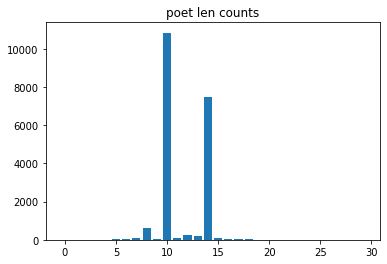

In [61]:
#draw poet length
x = range(30)
count = [0 for i in range(30)]
for i in poet['len']:
    try:
        count[int(i)] += 1
    except:
        print(int(i))
y = count 
plt.bar(x, y)
plt.title('poet len counts')
plt.plot()

In [93]:
#sort author with number of author
author_name = list(set(poet['author']))
author_count = [0 for i in range(len(author_name))]
for i in poet['author']:
    for j in range(len(author_name)):
        if i == author_name[j]:
            author_count[j] += 1

('張耒', '韓淲', '蘇軾', '方回', '梅堯臣', '白居易', '趙蕃', '楊萬里', '劉克莊', '陸游')


[]

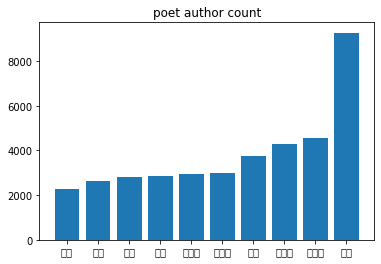

In [95]:
y, x = zip(*sorted(zip(author_count, author_name)))
# x = author_name
# y = author_count
print(x[-10:])
x = x[-10:]
y = y[-10:]
plt.title('poet author count')
plt.bar(x, y)
plt.plot()

In [97]:
#tokenize poet
def character_tokenize(txt: str):
    tknzr = []
    for i in txt:
        tknzr.append(i)
    return set(tknzr)
def jieba_tokenize(txt: str):
    tknzr = []
    tknzr = jieba.lcut(txt)
    return set(tknzr)

In [99]:
#tokenizer test
s = "hello world"
x = "床前明月光，泥四地上雙。"
print(tokenizer(x))

['床', '前', '明', '月', '光', '，', '泥', '四', '地', '上', '雙', '。']


In [103]:
#trian tokenizer
word = ()
for i in tqdm(poet['paragraphs']):
    for j in i:
        word = set([*word, *tokenizer(j)])

100%|██████████| 311269/311269 [18:40<00:00, 277.79it/s]


In [107]:
print(len(word))

12902


In [111]:
l_word = list(word)
f = open('word.json', 'w')
json.dump(l_word, f)

In [112]:
f = open('word.json', 'r')
cool = json.load(f)

In [113]:
print(len(cool))

12902
